# SHAP - IMAGE

In [1]:
import shap
shap.initjs()
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D,Dense,Dropout,Flatten,Conv2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data=ImageDataGenerator(rescale=1/255,validation_split=0.2)
train_gen=train_data.flow_from_directory('F:/XAI_LAB/cats_dogs',target_size=(150,150),batch_size=32,class_mode='binary',subset='training')
val_gen=train_data.flow_from_directory('F:/XAI_LAB/cats_dogs',target_size=(150,150),batch_size=32,class_mode='binary',subset='validation')

Found 106 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [3]:
model=Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),    
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_gen,validation_data=val_gen,epochs=10)

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 978ms/step - accuracy: 0.4606 - loss: 0.9221 - val_accuracy: 0.5385 - val_loss: 0.6888
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 796ms/step - accuracy: 0.6442 - loss: 0.6678 - val_accuracy: 0.4615 - val_loss: 0.6954
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 643ms/step - accuracy: 0.5583 - loss: 0.6895 - val_accuracy: 0.5385 - val_loss: 0.6904
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 831ms/step - accuracy: 0.5260 - loss: 0.6802 - val_accuracy: 0.5385 - val_loss: 0.6952
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 751ms/step - accuracy: 0.7196 - loss: 0.6654 - val_accuracy: 0.5385 - val_loss: 0.7076
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 618ms/step - accuracy: 0.6380 - loss: 0.6304 - val_accuracy: 0.4231 - val_loss: 0.7217
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 565ms/step - accuracy: 0.7981 - loss: 0.5962 - val_accuracy: 0.5385 - val_loss: 0.7555
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 594ms/step - accuracy: 0.6227 - loss: 0.5628 - val_accuracy: 0.4615 - val_loss:

In [4]:
sample,label=next(val_gen)
img=sample[0]
img_batch=np.expand_dims(img,axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


C:\Users\User\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(1, 150, 150, 3))']
  warnings.warn(msg)
C:\Users\User\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(50, 150, 150, 3))']
  warnings.warn(msg)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0123258912935853..0.013183449395000935].


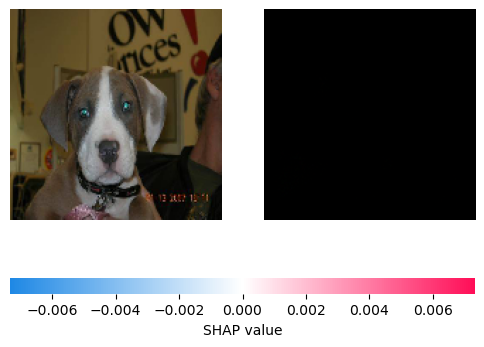

In [5]:
preds=model.predict(img_batch)
background=np.random.randn(10,150,150,3)
explainer=shap.GradientExplainer(model,background)
shap_values,indices=explainer.shap_values(img_batch,ranked_outputs=2)
shap.image_plot(shap_values,img_batch)

# SHAP - TABULAR

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor

In [8]:
df=pd.read_csv('german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [9]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [10]:
num_feat=['Age','Credit amount','Duration']
cat_feat=['Sex','Job','Housing','Saving accounts','Checking account','Purpose']
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [11]:
miss_feat=['Saving accounts','Checking account']
df.fillna('Unknown',inplace=True)
df.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [12]:
le=LabelEncoder()
for feat in cat_feat:
    df[feat]=le.fit_transform(df[feat])
df['Risk']=le.fit_transform(df['Risk'])

In [13]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,1,2,1,0,1,1169,6,5,1
1,1,22,0,2,1,1,2,5951,48,5,0
2,2,49,1,1,1,1,0,2096,12,3,1
3,3,45,1,2,0,1,1,7882,42,4,1
4,4,53,1,2,0,1,1,4870,24,1,0


In [17]:
x=df.drop('Risk',axis=1)
y=df['Risk']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
model=RandomForestRegressor(n_estimators=2000,max_depth=30,random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=30, n_estimators=2000, random_state=42)

In [19]:
explainer=shap.TreeExplainer(model)
shap_values=explainer.shap_values(x)

C:\Users\User\AppData\Local\Temp\ipykernel_7628\2719887685.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values,x)


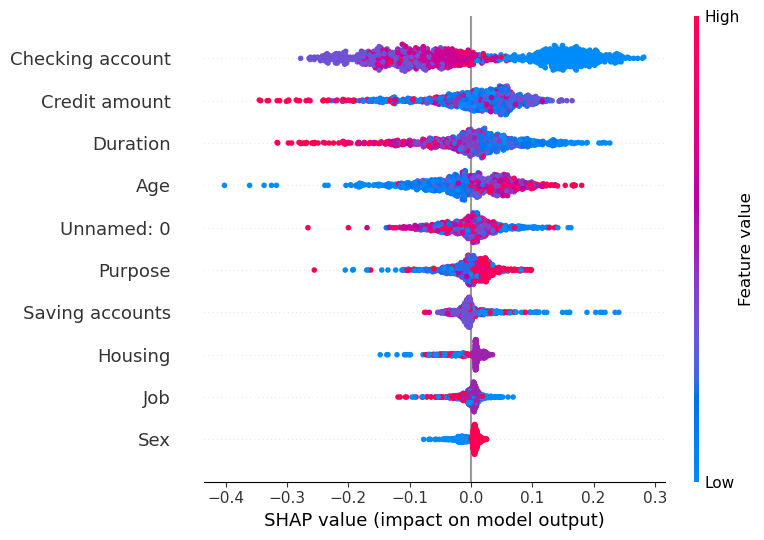

In [20]:
shap.summary_plot(shap_values,x)

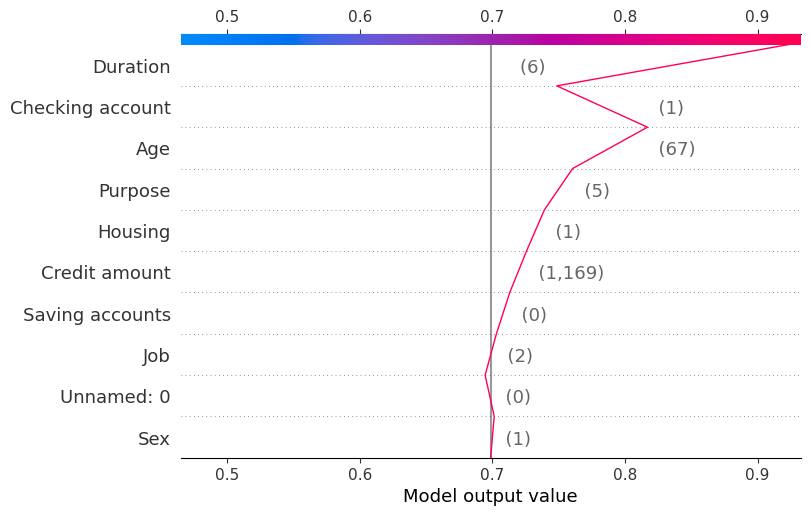

In [21]:
shap.decision_plot(explainer.expected_value,shap_values[0],x.iloc[0,:])

In [22]:
shap.force_plot(explainer.expected_value,shap_values[0],x.iloc[0,:])

# SHAP - TEXT

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [33]:
with open("shap_text.txt", "r") as f:
    x = [line.strip() for line in f if line.strip()]
y = [1 if "good" in text or "love" in text or "fantastic" in text else 0 for text in x]
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(x)
model = LogisticRegression()
model.fit(X_vec, y)

LogisticRegression()

In [34]:
explainer = shap.Explainer(model, X_vec)
shap_values = explainer(X_vec)
feature_names = vectorizer.get_feature_names_out()

In [36]:
for i in range(len(x)):
    print(f"\nText {i+1}: {x[i]}")
    print("Important words and their SHAP values:")
    for idx in shap_values[i].values.argsort()[::-1][:5]: 
        print(f"  {feature_names[idx]}: {shap_values[i].values[idx]:.4f}")
    print("=" * 50)


Text 1: The movie was fantastic! I loved it.
Important words and their SHAP values:
  movie: 0.0717
  loved: 0.0717
  the: 0.0717
  fantastic: 0.0717
  not: 0.0373

Text 2: Absolutely terrible film. Never again.
Important words and their SHAP values:
  not: 0.0373
  great: 0.0093
  bad: 0.0093
  okay: 0.0093
  but: 0.0093

Text 3: It was okay, not great but not bad either.
Important words and their SHAP values:
  absolutely: 0.0180
  never: 0.0180
  terrible: 0.0180
  again: 0.0180
  film: 0.0180
